# Exploratory Data Analysis

In [100]:
# import libraries
import os
import sys
import urllib.request
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Naver News
### 1-1. Naver API

In [77]:
client_id = "sPoIaxsqZqCViA3jWiOG"
client_secret = "zb_x9LGf4b"

In [78]:
encText = urllib.parse.quote("전기차 보조금") # search term
display = 15
sort = "date"

url = "https://openapi.naver.com/v1/search/news?query=" + encText \
    + "&display=" + str(display) \
    + "&sort=" + sort

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    json_str = response_body.decode('utf-8')
else:
    print("Error Code:" + rescode)
    
json_object = json.loads(json_str) # to json
df = pd.DataFrame(json_object['items']) # to dataframe
df

,title,originallink,link,description,pubDate
0,[조일훈 칼럼] 30년 투자로 열어젖힌 배터리 신세계,https://www.hankyung.com/finance/article/20221...,https://n.news.naver.com/mnews/article/015/000...,중국이 막대한 <b>보조금</b>으로 키운 CATL 기업가치가 한국 기업들로 급속히...,"Thu, 10 Nov 2022 00:36:00 +0900"
1,[사설] 美 ‘자국 우선주의’ 계속…정교한 외교로 국익 지켜라,https://www.sedaily.com/NewsView/26DKJCR443,https://n.news.naver.com/mnews/article/011/000...,우선 한국산 <b>전기차</b>를 <b>보조금</b> 혜택에서 제외한 미국의 인플레...,"Thu, 10 Nov 2022 00:02:00 +0900"
2,"공화당도 “메이드인 아메리카” 찬성, 인플레법 개정 불투명",https://www.joongang.co.kr/article/25116301,https://n.news.naver.com/mnews/article/025/000...,공화당이 IRA에 반대한 이유는 한국의 국익이 걸린 <b>전기차 보조금</b> 차별...,"Thu, 10 Nov 2022 00:01:00 +0900"
3,【박란희의 TalkTalk】 COP27은 어디로 갔나,http://www.impacton.net/news/articleView.html?...,http://www.impacton.net/news/articleView.html?...,"지난해 풍력과 태양광, 탄소 포집과 저장(CCUS), <b>전기차</b>(운송), ...","Wed, 09 Nov 2022 22:04:00 +0900"
4,"세계 1등 수소산업 육성…정부, 3대 성장전략 수립",http://www.e2news.com/news/articleView.html?id...,http://www.e2news.com/news/articleView.html?id...,"수소버스·트럭의 구매<b>보조금</b>을 확대하고, 지자체 대상 수소버스·충전소 구...","Wed, 09 Nov 2022 22:02:00 +0900"
5,"공화당 하원 탈환 땐…대북인권서 목소리, IRA 개정은 불투명",https://www.joongang.co.kr/article/25116281,https://n.news.naver.com/mnews/article/025/000...,하지만 IRA 반대의 이유는 한국이 문제 삼는 <b>전기차 보조금</b> 차별이 아...,"Wed, 09 Nov 2022 22:00:00 +0900"
6,"공화당 주도 미 하원, 대북 기조 ‘파격적 변화’ 가능성 적어",https://www.khan.co.kr/politics/defense-diplom...,https://n.news.naver.com/mnews/article/032/000...,그러나 IRA 자체가 미국 제조업 부활과 중국 견제 목적이 강하기 때문에 한국이 피...,"Wed, 09 Nov 2022 21:49:00 +0900"
7,"&quot;세계 1위 수소 국가로&quot;…상용차 넣고, 승용차 빠졌다?",https://news.sbs.co.kr/news/endPage.do?news_id...,https://n.news.naver.com/mnews/article/055/000...,"수소 트럭과 수소 버스에 <b>보조금</b>을 더 줘서 보급을 확대하기로 했는데, ...","Wed, 09 Nov 2022 21:02:00 +0900"
8,&apos;한국 <b>전기차</b> 차별&apos; IRA…미 중간선거 후 개정 가능성?,https://news.sbs.co.kr/news/endPage.do?news_id...,https://n.news.naver.com/mnews/article/055/000...,이번 중간 선거 결과에 따라 미국 의회 지형이 달라지면 우리와 연관 있는 <b>전기...,"Wed, 09 Nov 2022 21:00:00 +0900"
9,"하원 공화당 우세, 상원은 박빙…현장서 본 미 중간선거",https://news.sbs.co.kr/news/endPage.do?news_id...,https://n.news.naver.com/mnews/article/055/000...,또한 모두에게 공평한 사회가 돼야 하고요.] 특히 조지아주는 인플레이션 감축법으로 ...,"Wed, 09 Nov 2022 20:58:00 +0900"


### 1-2. Naver News

* Chosun
* Donga
* Hani
* Joongang
* Khan

In [79]:
!pip install dash
import plotly.express as px
import plotly.graph_objects as go

In [80]:
news = pd.read_csv("/Users/2hyunie/Documents/qmss_thesis/Datasets/raw/articles_ev.csv")
news.head()

,date,khan,hani,chosun,donga,joongang
0,2018/01,28,27,0,63,0
1,2018/02,30,20,0,60,0
2,2018/03,16,24,0,57,0
3,2018/04,23,20,0,49,0
4,2018/05,30,18,0,35,0


In [81]:
news['date'] = pd.to_datetime(news['date'])
news.dtypes

date        datetime64[ns]
khan                 int64
hani                 int64
chosun               int64
donga                int64
joongang             int64
dtype: object

In [83]:
news['mean'] = news.mean(numeric_only=True, axis=1)
news['sum'] = news.sum(numeric_only=True, axis=1)
news.head()

,date,khan,hani,chosun,donga,joongang,mean,sum
0,2018-01-01,28,27,0,63,0,23.6,141.6
1,2018-02-01,30,20,0,60,0,22.0,132.0
2,2018-03-01,16,24,0,57,0,19.4,116.4
3,2018-04-01,23,20,0,49,0,18.4,110.4
4,2018-05-01,30,18,0,35,0,16.6,99.6


In [107]:
news = news.dropna()
news.head()

,date,khan,hani,chosun,donga,joongang,mean,sum,sum_pct
1,2018-02-01,30,20,0,60,0,22.0,132.0,-0.067797
2,2018-03-01,16,24,0,57,0,19.4,116.4,-0.118182
3,2018-04-01,23,20,0,49,0,18.4,110.4,-0.051546
4,2018-05-01,30,18,0,35,0,16.6,99.6,-0.097826
5,2018-06-01,13,16,0,42,0,14.2,85.2,-0.144578


In [84]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = news['date'], y = news['chosun'],
             name = 'The Chosun Ilbo', mode = 'lines'))
fig.add_trace(go.Scatter(x = news['date'], y = news['donga'],
             name = 'The Dong-a Ilbo', mode = 'lines'))
fig.add_trace(go.Scatter(x = news['date'], y = news['hani'],
             name = 'The Hankyoreh', mode = 'lines'))
fig.add_trace(go.Scatter(x = news['date'], y = news['joongang'],
             name = 'JoongAng Ilbo', mode = 'lines'))
fig.add_trace(go.Scatter(x = news['date'], y = news['khan'],
             name = 'Kyunghyang Shinmun', mode = 'lines'))

fig.update_layout(title = 'Count of Articles on "Electric Vehicles"',
                 xaxis_title = 'Date',
                 yaxis_title = 'Count',
                 template = 'simple_white')

fig.show()

In [122]:
fig = px.bar(news, x = 'date',
             y = ['chosun','donga','hani','joongang','khan'])
fig.update_layout(title = 'Count of Articles on "Electric Vehicles"',
                 xaxis_title = 'Date',
                 yaxis_title = 'Count',
                 template = 'simple_white')
fig.show()

## 2. Google trends

In [85]:
!pip install pytrends

In [88]:
from pytrends.request import TrendReq

In [109]:
pytrends = TrendReq(hl='ko', tz=540)

kw_list = ["전기차", "친환경"]

pytrends.build_payload(kw_list, cat=0, timeframe="2020-02-05 2022-11-01", geo="KR")
google = pytrends.interest_over_time()
google = google.reset_index()

fig = px.line(google, x="date", y=kw_list,
              title="Google Trends in South Korea",
             labels={
                 "variable" : "Search Term", "date" : "Time", "value" : "Popularity"
             }, template = 'simple_white')

fig.show()

ResponseError: The request failed: Google returned a response with code 429.

In [ ]:
google = google.drop('isPartial', axis=1)
google.head()

## 3. Covid-19 Data

link: https://115.84.165.39/dataList/OA-20461/S/1/datasetView.do

In [90]:
# retrieving data

covid = pd.read_csv("/Users/2hyunie/Documents/qmss_thesis/Datasets/raw/covid_data.csv")

In [91]:
# selecting necessary columns

covid = covid.iloc[:, [0,1,2,6,11,12,15]]

In [92]:
# changing column names

covid.columns = ['date', 'seoul_pat', 'seoul_new', 'seoul_death', 'nat_pat', 'nat_new', 'nat_death']

In [93]:
covid.dtypes

date            object
seoul_pat        int64
seoul_new        int64
seoul_death      int64
nat_pat        float64
nat_new          int64
nat_death        int64
dtype: object

In [94]:
covid['date'] = pd.to_datetime(covid['date'])

In [95]:
covid.dtypes

date           datetime64[ns]
seoul_pat               int64
seoul_new               int64
seoul_death             int64
nat_pat               float64
nat_new                 int64
nat_death               int64
dtype: object

In [96]:
covid.head()

,date,seoul_pat,seoul_new,seoul_death,nat_pat,nat_new,nat_death
0,2022-11-01,5003593,13017,5608,25615667.0,58379,29209
1,2022-10-31,4990582,3099,5603,25557309.0,18510,29176
2,2022-10-30,4987483,6708,5598,25538799.0,34511,29158
3,2022-10-29,4980775,7578,5597,25504288.0,37321,29131
4,2022-10-28,4973197,7480,5594,25466992.0,35924,29100


In [97]:
x = covid['date']
y = covid['nat_new']

fig = px.line(covid, x, y, title="Daily Covid-19 Cases",
             labels={
                 "date" : "Date", "nat_new" : "New Patients"
             }, template = 'simple_white')
fig.show()

## 4. EV Sales Data

In [112]:
hyundai = pd.read_csv('/Users/2hyunie/Documents/qmss_thesis/Datasets/raw/hyundai.csv')
hyundai.head()

,date,avante_hev_d,ioniq_hev_d,ioniq_phev_d,ioniq_ev_d,sonata_hev_d,sonata_phev_d,sonata_dn8_hev_d,grandeur_hev_d,g80_ev_d,...,sonata_dn8_hev_e,grandeur_hev_e,g80_ev_e,kona_hev_e,kona_ev_e,tuscon_hev_e,tuscon_phev_e,santa_hev_e,santa_phev_e,gv70_ev_e
0,2018-01,NaN,207.0,5.0,1086.0,289.0,1.0,NaN,1939,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-02,NaN,322.0,11.0,949.0,294.0,4.0,NaN,1625,NaN,...,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN
2,2018-03,NaN,201.0,10.0,886.0,304.0,4.0,NaN,1945,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
3,2018-04,NaN,353.0,14.0,485.0,333.0,1.0,NaN,1728,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
4,2018-05,NaN,259.0,7.0,548.0,347.0,4.0,NaN,2521,NaN,...,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN


In [116]:
hyundai = hyundai.fillna(0)
hyundai['date'] = pd.to_datetime(hyundai['date'])
hyundai.head()

,date,avante_hev_d,ioniq_hev_d,ioniq_phev_d,ioniq_ev_d,sonata_hev_d,sonata_phev_d,sonata_dn8_hev_d,grandeur_hev_d,g80_ev_d,...,sonata_dn8_hev_e,grandeur_hev_e,g80_ev_e,kona_hev_e,kona_ev_e,tuscon_hev_e,tuscon_phev_e,santa_hev_e,santa_phev_e,gv70_ev_e
0,2018-01-01,0.0,207.0,5.0,1086.0,289.0,1.0,0.0,1939,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-02-01,0.0,322.0,11.0,949.0,294.0,4.0,0.0,1625,0.0,...,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0
2,2018-03-01,0.0,201.0,10.0,886.0,304.0,4.0,0.0,1945,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
3,2018-04-01,0.0,353.0,14.0,485.0,333.0,1.0,0.0,1728,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,2018-05-01,0.0,259.0,7.0,548.0,347.0,4.0,0.0,2521,0.0,...,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0


In [117]:
hyundai['mean'] = hyundai.mean(numeric_only=True, axis=1)

In [118]:
for col in hyundai.columns:
    print(col)

date
avante_hev_d
ioniq_hev_d
ioniq_phev_d
ioniq_ev_d
sonata_hev_d
sonata_phev_d
sonata_dn8_hev_d
grandeur_hev_d
g80_ev_d
kona_hev_d
kona_ev_d
tuscon_hev_d
santa_hev_d
gv70_ev_d
avante_hev_e
ioniq_hev_e
ioniq_phev_e
ioniq_ev_e
sonata_hev_e
sonata_phev_e
sonata_dn8_hev_e
grandeur_hev_e
g80_ev_e
kona_hev_e
kona_ev_e
tuscon_hev_e
tuscon_phev_e
santa_hev_e
santa_phev_e
gv70_ev_e
mean


In [129]:
fig = px.bar(hyundai, x = 'date',
             y = ['ioniq_ev_d','g80_ev_d','kona_ev_d','gv70_ev_d'])
fig.update_layout(title = 'Count of domestic Hyundai EV sales',
                 xaxis_title = 'Date',
                 yaxis_title = 'Count',
                 template = 'simple_white',
                 showlegend=False)
fig.show()

In [131]:
fig = px.bar(hyundai, x = 'date',
             y = ['avante_hev_d','ioniq_hev_d','sonata_hev_d','sonata_dn8_hev_d','grandeur_hev_d',
                  'kona_hev_d','tuscon_hev_d','santa_hev_d'])
fig.update_layout(title = 'Count of domestic Hyundai HEV sales',
                 xaxis_title = 'Date',
                 yaxis_title = 'Count',
                 template = 'simple_white',
                 showlegend=False)
fig.show()

In [130]:
fig = px.bar(hyundai, x = 'date',
             y = ['ioniq_ev_e','g80_ev_e','kona_ev_e','gv70_ev_e'])
fig.update_layout(title = 'Count of Hyundai EV export sales',
                 xaxis_title = 'Date',
                 yaxis_title = 'Count',
                 template = 'simple_white',
                 showlegend=False)
fig.show()

In [132]:
fig = px.bar(hyundai, x = 'date',
             y = ['avante_hev_e','ioniq_hev_e','sonata_hev_e','sonata_dn8_hev_e','grandeur_hev_e',
                 'kona_hev_e','tuscon_hev_e','santa_hev_e'])
fig.update_layout(title = 'Count of Hyundai HEV export sales',
                 xaxis_title = 'Date',
                 yaxis_title = 'Count',
                 template = 'simple_white',
                 showlegend=False)
fig.show()

## 5. Time Series Exploration

1. Correlation of two time series

In [99]:
# google trends and naver news

news['sum_pct'] = news['sum'].pct_change()

# google.resample(rule='M').last()
# google['ev_pct'] = google['전기차'].pct_change()

# plt.scatter(news['sum_pct'], google['ev_pct'])
# plt.show()

# correlation = news['sum_pct'].corr(google['ev_pct'])
# print(correlation)

TypeError: unsupported operand type(s) for *: 'Timestamp' and 'float'

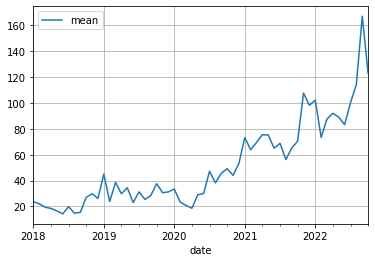

In [105]:
news.plot(x = 'date', y = 'mean', grid = True)
sns.regplot(x = 'date', y = 'mean', data = news, scatter = False, ci = None, fit_reg = True, color = 'm')

In [108]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# fit regression model
lm_news = smf.ols('sum ~ date', data = news).fit()
lm_news.summary()

/Users/2hyunie/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1728: RuntimeWarning:

divide by zero encountered in true_divide

/Users/2hyunie/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1728: RuntimeWarning:

invalid value encountered in double_scalars

/Users/2hyunie/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1650: RuntimeWarning:

divide by zero encountered in double_scalars



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sum   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 09 Nov 2022   Prob (F-statistic):                nan
Time:                        11:08:49   Log-Likelihood:                 1524.2
No. Observations:                  57   AIC:                            -2934.
Df Residuals:                       0   BIC:                            -2818.
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                  132.0000        inf          0        nan         nan         nan
date[T.Timestamp('2018-03-01 00:00:00')]   -15.6000        inf         -0        nan         nan         nan
date[T.Timestamp('2018-04-01 00:00:00')]   -21.6000        inf         -0        nan         nan         nan
date[T.Timestamp('2018-05-01 00:00:00')]   -32.4000        inf         -0        nan         nan         nan
date[T.Timestamp('2018-06-01 00:00:00')]   -46.8000        inf         -0        nan         nan         nan
date[T.Timestamp('2018-07-01 00:00:00')]   -13.2000        inf         -0        nan         nan         nan
date[T.Timestamp('2018-08-01 00:00:00')]   -43.2000        inf         -0        nan         nan         nan
date[T.Timestamp('2018-09-01 00:00:00')]   -39.6000        inf         -0        nan         nan         nan
date[T.Timestamp('2018-10-01 00:00:00')]    30.0000        inf          0        nan         nan         nan
date[T.Timestamp('2018-11-01 00:00:00')]    46.8000        inf          0        nan         nan         nan
date[T.Timestamp('2018-12-01 00:00:00')]    25.2000        inf          0        nan         nan         nan
date[T.Timestamp('2019-01-01 00:00:00')]   138.0000        inf          0        nan         nan         nan
date[T.Timestamp('2019-02-01 00:00:00')]    10.8000        inf          0        nan         nan         nan
date[T.Timestamp('2019-03-01 00:00:00')]    99.6000        inf          0        nan         nan         nan
date[T.Timestamp('2019-04-01 00:00:00')]    46.8000        inf          0        nan         nan         nan
date[T.Timestamp('2019-05-01 00:00:00')]    74.4000        inf          0        nan         nan         nan
date[T.Timestamp('2019-06-01 00:00:00')]     6.0000        inf          0        nan         nan         nan
date[T.Timestamp('2019-07-01 00:00:00')]    55.2000        inf          0        nan         nan         nan
date[T.Timestamp('2019-08-01 00:00:00')]    20.4000        inf          0        nan         nan         nan
date[T.Timestamp('2019-09-01 00:00:00')]    38.4000        inf          0        nan         nan         nan
date[T.Timestamp('2019-10-01 00:00:00')]    93.6000        inf          0        nan         nan         nan
date[T.Timestamp('2019-11-01 00:00:00')]    51.6000        inf          0        nan         nan         nan
date[T.Timestamp('2019-12-01 00:00:00')]    55.2000        inf          0        nan         nan         nan
date[T.Timestamp('2020-01-01 00:00:00')]    68.4000        inf          0        nan         nan         nan
date[T.Timestamp('2020-02-01 00:00:00')]     8.4000        inf          0        nan         nan         nan
date[T.Timestamp('2020-03-01 00